In [1]:
# Evaluation of experiments
import matplotlib.pyplot as plt
import pandas as pd

dfExperiments = pd.read_csv('experiments_similarityScore_45_negativeSamples_3_2019-01-07T16-37-43.467.csv', sep=',', low_memory=False, header=None)
dfExperimentsHARD = pd.read_csv('experiments_similarityScore_70_negativeSamples_3_2019-01-07T16-33-26.859.csv', sep=',', low_memory=False, header=None)

dfExperiments.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']
dfExperimentsHARD.columns = ['Timestamp', 'Experiment', 'Class', 'TargetTable', 'Precision', 'Recall', 'F-1', 'Blocker', 'BlockingFunction', 'TrainedOn', 'TrainedModel']

In [2]:
#Rearrange DataFrame
def rearrange(df):
    dfAllExperimentsRearranged = pd.DataFrame()
    for index, row in df.iterrows():
        rowPrecision = row
        rowPrecision['ResultValue'] = row['Precision-Delta']
        rowPrecision['ResultValueType'] = 'Precision-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        rowRecall = row
        rowRecall['ResultValue'] = row['Recall-Delta']
        rowRecall['ResultValueType'] = 'Recall-Delta'
        
        dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowPrecision)
        
        #rowF1 = row
        #rowF1['ResultValue'] = row['F-1']
        #rowF1['ResultValueType'] = 'F-1'
        
        #dfAllExperimentsRearranged = dfAllExperimentsRearranged.append(rowF1)
    
    return dfAllExperimentsRearranged

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def plotResults(df, title):
    sns.set(style="whitegrid")
    fig, ax1 = plt.subplots(figsize=(20,8))
    sns.catplot(x="shortExperiment", y="ResultValue", hue="ResultValueType", data=df, height=6, kind="bar", ax=ax1)
    
    titleAll = 'Transfer Comparison ' + title
    ax1.set_title(titleAll, fontweight="bold", size=20) # Title
    ax1.set_xlabel("Experiments",fontsize = 20.0)
    ax1.set_ylabel("" ,fontsize = 20.0) # Y label
    ax1.tick_params(direction='out', length=6, width=2, labelsize=20, grid_alpha=0.5)
    ax1.tick_params(axis = 'x', labelrotation=45)
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=20)

In [4]:
dfBaselineSubSet = dfExperimentsHARD[dfExperimentsHARD['Experiment'].str.contains('baseline_')]
dfBestBaseline = pd.DataFrame()
for target in set(dfBaselineSubSet['TargetTable']):
    dfTargetBaseline = dfBaselineSubSet[dfBaselineSubSet['TargetTable'] == target]
    dfTargetBaseline = dfTargetBaseline.sort_values(by=['F-1'], ascending=False)
    dfBestBaseline = dfBestBaseline.append(dfTargetBaseline.iloc[0])
display(dfBestBaseline)

,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
2,NaN,NaN,citation,baseline_linear_combination_citation-acm.csv,0.783784,0.674419,0.935484,acm.csv,2019-01-07_16-32-50-164,NaN,acm.csv
3,NaN,NaN,citation,baseline_label_citation-scholar.csv,0.585014,0.446154,0.849372,scholar.csv,2019-01-07_16-32-50-551,NaN,scholar.csv
6,NaN,NaN,citation,baseline_label_citation-all,0.634146,0.509804,0.838710,all,2019-01-07_16-32-51-447,NaN,all


,Blocker,BlockingFunction,Class,Experiment,F-1,Precision,Recall,TargetTable,Timestamp,TrainedModel,TrainedOn
2,NaN,NaN,citation,baseline_linear_combination_citation-acm.csv,0.783784,0.674419,0.935484,acm.csv,2019-01-07_16-32-50-164,NaN,acm.csv
3,NaN,NaN,citation,baseline_label_citation-scholar.csv,0.585014,0.446154,0.849372,scholar.csv,2019-01-07_16-32-50-551,NaN,scholar.csv
6,NaN,NaN,citation,baseline_label_citation-all,0.634146,0.509804,0.838710,all,2019-01-07_16-32-51-447,NaN,all


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,-0.050091,-0.291942,Recall-Delta-Mean,0.132037,SimpleLogistic-acm.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,-0.041318,-1.110223e-16,Recall-Delta-Mean,0.060056,SimpleLogistic-scholar.csv


,MeanF1Delta,ResultValue,ResultValueType,StdF1Delta,shortExperiment
0,0.00941,0.025105,Recall-Delta-Mean,0.028088,SimpleLogistic-all


-0.0252

0.0741

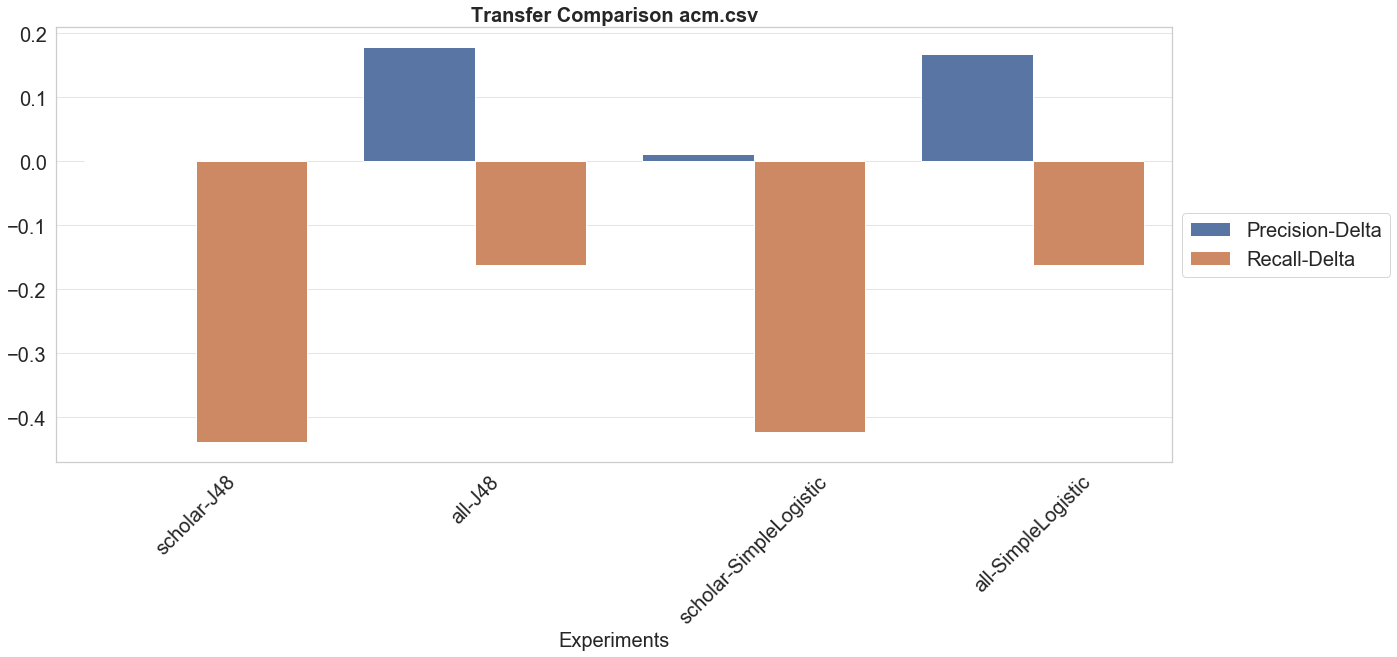

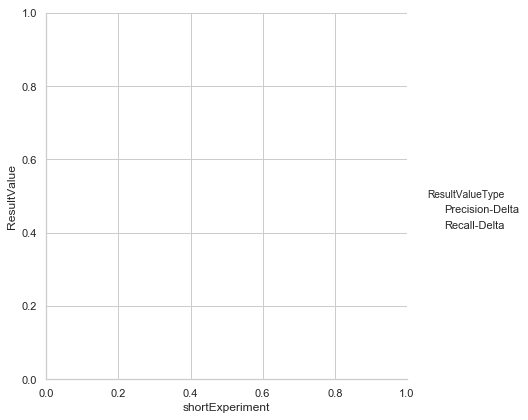

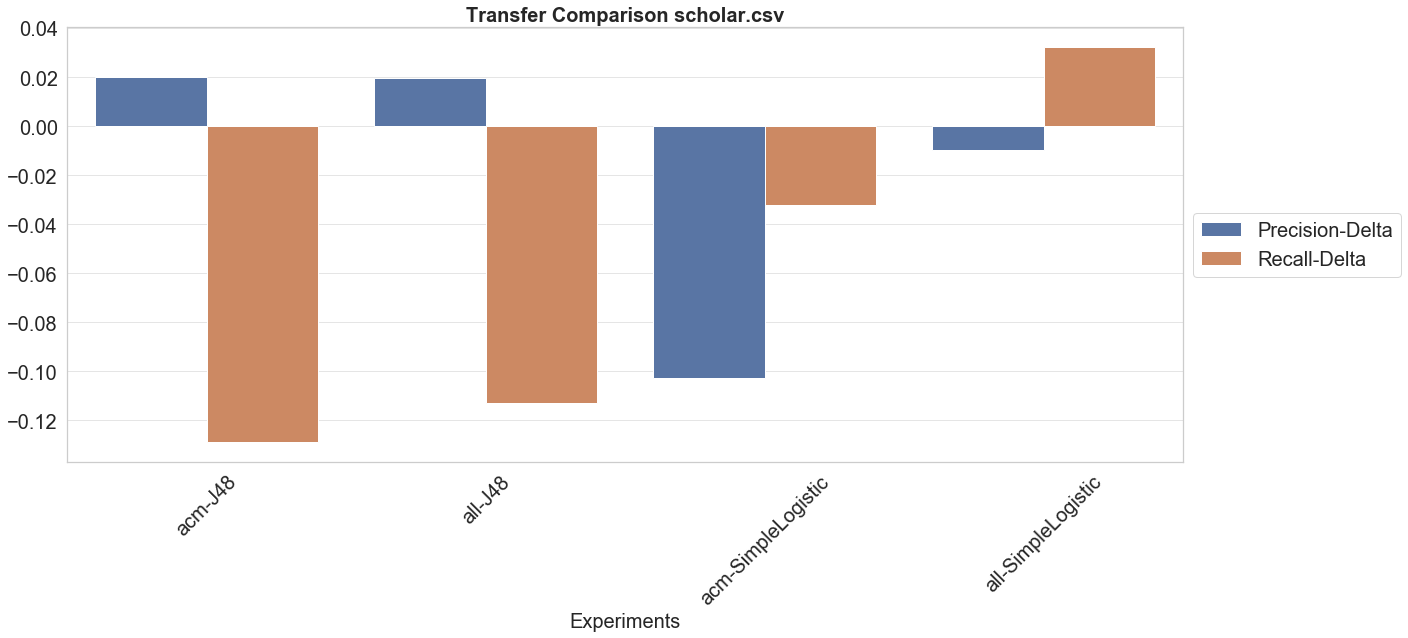

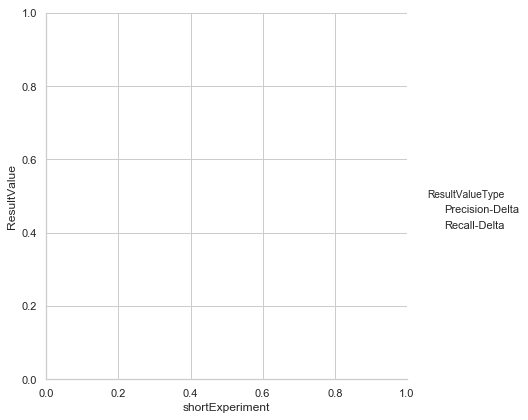

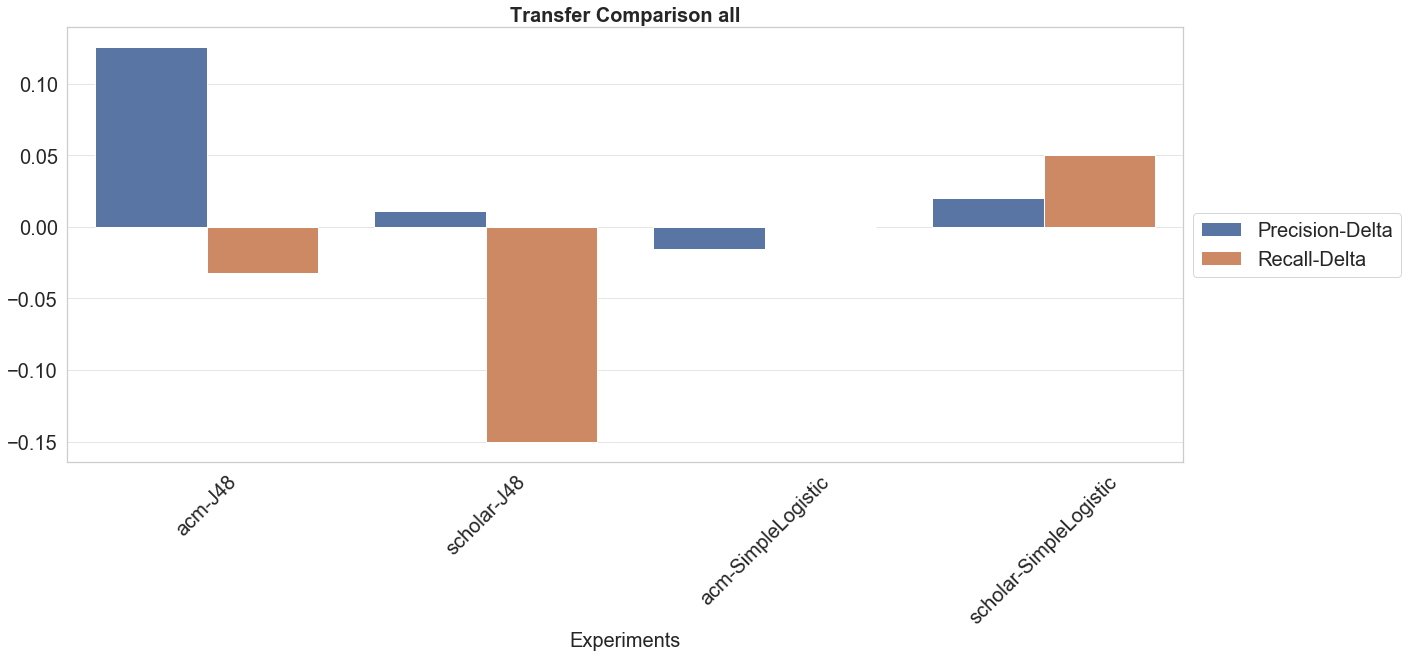

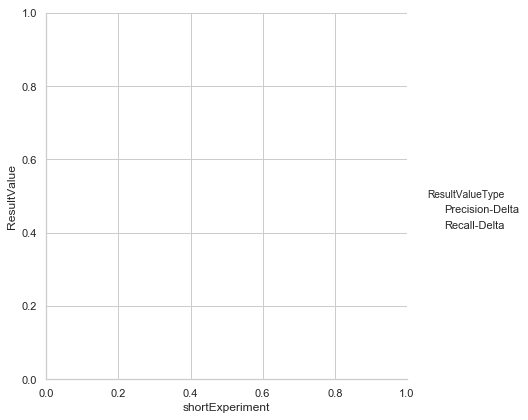

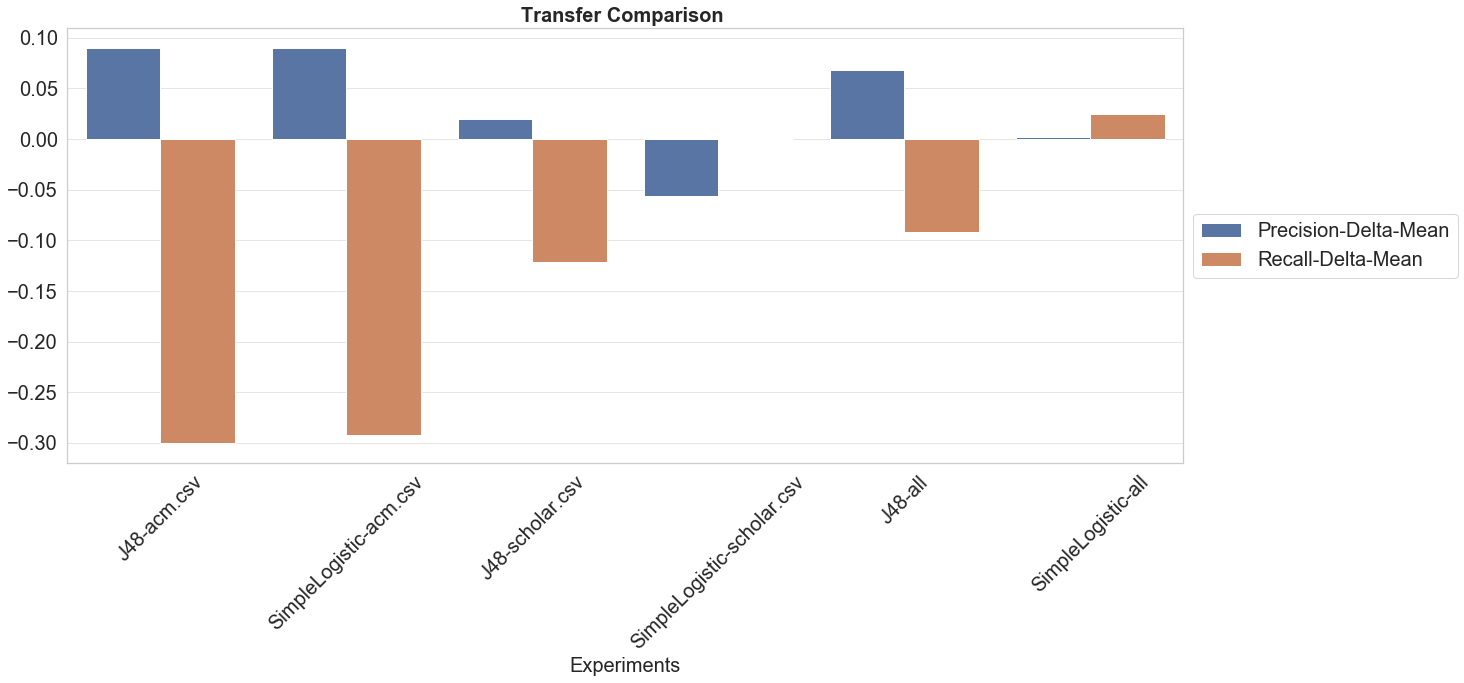

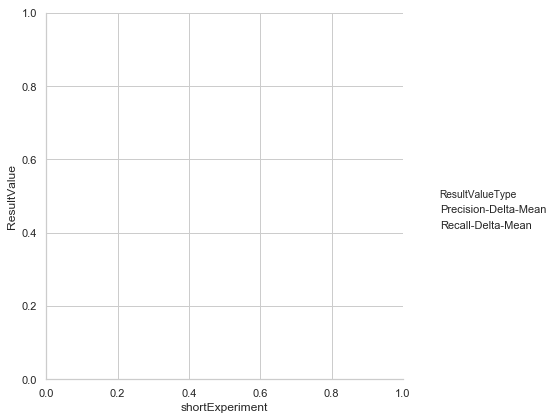

In [5]:
#Keep only transfer Experiments
dfExperimentsTransfer = dfExperiments[dfExperiments['Experiment'].str.contains('transfer_')]
dfExperimentsLearned = dfBestBaseline

dfMeanRulePerformance = pd.DataFrame()

display(dfExperimentsLearned)
for trainedOn in dfExperimentsTransfer['TrainedOn'].unique():
    dfTransferExperimentsTmpCompared = pd.DataFrame()
    
    dfSubSetExperimentsTransfer = dfExperimentsTransfer[dfExperimentsTransfer['TrainedOn'] == trainedOn]
    
    for indexTransfer, rowTransfer in dfSubSetExperimentsTransfer.iterrows():
        for indexLearned, rowLearned in dfExperimentsLearned.iterrows():
            if rowTransfer['TargetTable'] == rowLearned['TargetTable']:
                newRow = rowTransfer.copy()
                newRow['Precision-Delta'] = rowTransfer['Precision'] - rowLearned['Precision']
                newRow['Recall-Delta'] = rowTransfer['Recall'] - rowLearned['Recall']
                newRow['F-1-Delta'] = rowTransfer['F-1'] - rowLearned['F-1']
                newRow['Experiment'] = rowTransfer['Experiment']
            
                dfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared.append(newRow, ignore_index=True)
     
    #display(dfTransferExperimentsTmpCompared)
    meanRulePerformance = {}
    for model in dfTransferExperimentsTmpCompared['TrainedModel']:
        subdfTransferExperimentsTmpCompared = dfTransferExperimentsTmpCompared[dfTransferExperimentsTmpCompared['TrainedModel'] == model]

        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Precision-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Precision-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
        
        meanRulePerformance['shortExperiment'] = model + '-' + trainedOn
        meanRulePerformance['ResultValueType'] = 'Recall-Delta-Mean'
        meanRulePerformance['ResultValue'] = subdfTransferExperimentsTmpCompared['Recall-Delta'].mean()
        meanRulePerformance['MeanF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].mean()
        meanRulePerformance['StdF1Delta']= subdfTransferExperimentsTmpCompared['F-1-Delta'].std()
        
        dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
        dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    dfMeanPerfSingle = pd.DataFrame(meanRulePerformance, index=[0])
    dfMeanRulePerformance = dfMeanRulePerformance.append(dfMeanPerfSingle, ignore_index=True, sort=True)
    
    display(dfMeanPerfSingle)
    dfTransferExperimentsTmpComparedRearranged = rearrange(dfTransferExperimentsTmpCompared)
    dfTransferExperimentsTmpComparedRearranged['shortExperiment'] = dfTransferExperimentsTmpComparedRearranged['TargetTable'].str.replace('hotels_www.','').str.replace('.csv', '').str.cat(dfTransferExperimentsTmpComparedRearranged['TrainedModel'], sep='-')
    plotResults(dfTransferExperimentsTmpComparedRearranged, trainedOn)
    
plotResults(dfMeanRulePerformance, '')
display(round(dfMeanRulePerformance['MeanF1Delta'].mean(),4))
display(round(dfMeanRulePerformance['StdF1Delta'].mean(),4))

In [6]:
import csv
dfExperimentsTransferFiltered = dfExperimentsTransfer.filter(items=['Experiment','Precision', 'Recall', 'F-1', 'TargetTable', 'TrainedOn', 'TrainedModel'])
dfResultsRQ2 = pd.DataFrame()

for target in set(dfExperimentsTransferFiltered['TargetTable']):
    dfSubSeTransfertExperiments = dfExperimentsTransferFiltered[dfExperimentsTransferFiltered['TargetTable'] == target]
    dfSubBestBaseline = dfBestBaseline[dfBestBaseline['TargetTable'] == target]
    bestBaseline = dfSubBestBaseline.iloc[0]
    dfSubSeTransfertExperiments['F-1 Baseline'] = bestBaseline['F-1']
    dfSubSeTransfertExperiments['Precision Baseline'] = bestBaseline['Precision']
    dfSubSeTransfertExperiments['Recall Baseline'] = bestBaseline['Recall']
    dfSubSeTransfertExperiments['Best Baseline'] = bestBaseline['Experiment']
    dfSubSeTransfertExperiments['Delta F-1'] = dfSubSeTransfertExperiments['F-1'] - dfSubSeTransfertExperiments['F-1 Baseline']
    dfSubSeTransfertExperiments['Delta Precision'] = dfSubSeTransfertExperiments['Precision'] - dfSubSeTransfertExperiments['Precision Baseline']
    dfSubSeTransfertExperiments['Delta Recall'] = dfSubSeTransfertExperiments['Recall'] - dfSubSeTransfertExperiments['Recall Baseline']
    #dfSubSeTransfertExperiments['Delta Precision'] = bestBaseline['Precision'].subtract(dfSubSeTransfertExperiments['Precision Baseline'])
    #dfSubSeTransfertExperiments['Delta Recall'] = bestBaseline['Recall'].subtract(dfSubSeTransfertExperiments['Recall Baseline'])
    dfResultsRQ2 = dfResultsRQ2 .append(dfSubSeTransfertExperiments)

display(dfResultsRQ2)
dfResultsRQ2.to_csv('rq2_results_citation.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Alex\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Experiment,Precision,Recall,F-1,TargetTable,TrainedOn,TrainedModel,F-1 Baseline,Precision Baseline,Recall Baseline,Best Baseline,Delta F-1,Delta Precision,Delta Recall
13,transfer_matchingRule_citation-scholar.csv,0.694444,0.806452,0.746269,acm.csv,scholar.csv,J48,0.783784,0.674419,0.935484,baseline_linear_combination_citation-acm.csv,-0.037515,0.020026,-0.129032
16,transfer_matchingRule_citation-all,0.800000,0.903226,0.848485,acm.csv,all,J48,0.783784,0.674419,0.935484,baseline_linear_combination_citation-acm.csv,0.064701,0.125581,-0.032258
22,transfer_matchingRule_citation-scholar.csv,0.571429,0.903226,0.700000,acm.csv,scholar.csv,SimpleLogistic,0.783784,0.674419,0.935484,baseline_linear_combination_citation-acm.csv,-0.083784,-0.102990,-0.032258
25,transfer_matchingRule_citation-all,0.659091,0.935484,0.773333,acm.csv,all,SimpleLogistic,0.783784,0.674419,0.935484,baseline_linear_combination_citation-acm.csv,-0.010450,-0.015328,0.000000
10,transfer_matchingRule_citation-acm.csv,0.447489,0.410042,0.427948,scholar.csv,acm.csv,J48,0.585014,0.446154,0.849372,baseline_label_citation-scholar.csv,-0.157067,0.001335,-0.439331
17,transfer_matchingRule_citation-all,0.457534,0.698745,0.552980,scholar.csv,all,J48,0.585014,0.446154,0.849372,baseline_label_citation-scholar.csv,-0.032034,0.011380,-0.150628
19,transfer_matchingRule_citation-acm.csv,0.457399,0.426778,0.441558,scholar.csv,acm.csv,SimpleLogistic,0.585014,0.446154,0.849372,baseline_label_citation-scholar.csv,-0.143456,0.011245,-0.422594
26,transfer_matchingRule_citation-all,0.466377,0.899582,0.614286,scholar.csv,all,SimpleLogistic,0.585014,0.446154,0.849372,baseline_label_citation-scholar.csv,0.029271,0.020224,0.050209
11,transfer_matchingRule_citation-acm.csv,0.688525,0.677419,0.682927,all,acm.csv,J48,0.634146,0.509804,0.838710,baseline_label_citation-all,0.048780,0.178721,-0.161290
14,transfer_matchingRule_citation-scholar.csv,0.529412,0.725806,0.612245,all,scholar.csv,J48,0.634146,0.509804,0.838710,baseline_label_citation-all,-0.021901,0.019608,-0.112903


In [8]:
dfResultsRQ2 = dfResultsRQ2.sort_values(by=['TargetTable', 'TrainedOn', 'TrainedModel'])

dfResultsRQ2Filtered = dfResultsRQ2.filter(items=['TargetTable', 'TrainedOn', 'TrainedModel', 'Precision', 'Recall',  'F-1','Best Baseline','Delta Precision','Delta Recall','Delta F-1'])
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.replace('baseline_', '').str.replace('_citation', '')
dfResultsRQ2Filtered['Best Baseline'] = dfResultsRQ2Filtered['Best Baseline'].str.split('-', expand=True)[0]
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('J48', 'DT')
dfResultsRQ2Filtered['TrainedModel'] = dfResultsRQ2Filtered['TrainedModel'].str.replace('SimpleLogistic', 'LR')
dfResultsRQ2Filtered['TargetTable'] = dfResultsRQ2Filtered['TargetTable'].str.replace('.csv', '')
dfResultsRQ2Filtered['TrainedOn'] = dfResultsRQ2Filtered['TrainedOn'].str.replace('.csv', '')

dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('all', 'All')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('bag_of_words', 'BoW')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('linear_combination', 'LC')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.replace('label', 'Label')
dfResultsRQ2Filtered = dfResultsRQ2Filtered.round(3)

display(dfResultsRQ2Filtered)

print(dfResultsRQ2Filtered.to_latex(index=False))
dfResultsRQ2Filtered.to_csv('rq2_results_citation.csv', sep=',', encoding='utf-8', index=False, quotechar='"', quoting=csv.QUOTE_ALL)

,TargetTable,TrainedOn,TrainedModel,Precision,Recall,F-1,Best Baseline,Delta Precision,Delta Recall,Delta F-1
16,acm,All,DT,0.800,0.903,0.848,LC,0.126,-0.032,0.065
25,acm,All,LR,0.659,0.935,0.773,LC,-0.015,0.000,-0.010
13,acm,scholar,DT,0.694,0.806,0.746,LC,0.020,-0.129,-0.038
22,acm,scholar,LR,0.571,0.903,0.700,LC,-0.103,-0.032,-0.084
11,All,acm,DT,0.689,0.677,0.683,Label,0.179,-0.161,0.049
20,All,acm,LR,0.677,0.677,0.677,Label,0.168,-0.161,0.043
14,All,scholar,DT,0.529,0.726,0.612,Label,0.020,-0.113,-0.022
23,All,scholar,LR,0.500,0.871,0.635,Label,-0.010,0.032,0.001
10,scholar,acm,DT,0.447,0.410,0.428,Label,0.001,-0.439,-0.157
19,scholar,acm,LR,0.457,0.427,0.442,Label,0.011,-0.423,-0.143


\begin{tabular}{lllrrrlrrr}
\toprule
TargetTable & TrainedOn & TrainedModel &  Precision &  Recall &    F-1 & Best Baseline &  Delta Precision &  Delta Recall &  Delta F-1 \\
\midrule
        acm &       All &           DT &      0.800 &   0.903 &  0.848 &            LC &            0.126 &        -0.032 &      0.065 \\
        acm &       All &           LR &      0.659 &   0.935 &  0.773 &            LC &           -0.015 &         0.000 &     -0.010 \\
        acm &   scholar &           DT &      0.694 &   0.806 &  0.746 &            LC &            0.020 &        -0.129 &     -0.038 \\
        acm &   scholar &           LR &      0.571 &   0.903 &  0.700 &            LC &           -0.103 &        -0.032 &     -0.084 \\
        All &       acm &           DT &      0.689 &   0.677 &  0.683 &         Label &            0.179 &        -0.161 &      0.049 \\
        All &       acm &           LR &      0.677 &   0.677 &  0.677 &         Label &            0.168 &        -0.161 &   